In [1]:
import sys
import os
import pickle
from matplotlib.pyplot import imread
import numpy as np
import matplotlib.pyplot as plt

# example methods to calculate epipolar distance and sfm

In [2]:
def point_from_epipolar(known_point,unknown_point,foe,debug=False):
# define a line known_point<--->foe and get the distance
    line=np.cross(known_point,foe)
    line=line/(np.linalg.norm(line[:2]))
    d=unknown_point.dot(line)
    if debug:
        print (line, d)
        t=np.arange(0,2*np.pi,0.01)
        s=np.sin(t)
        c=np.cos(t)
        plt.figure("epi")
        plt.plot(known_point[0],known_point[1],"+r",markersize=5)
        plt.plot(foe[0],foe[1],"+b",markersize=5)
        plt.plot(unknown_point[0],unknown_point[1],".b",markersize=5)
        plt.plot(t,-(t*line[0]+line[2])/line[1])
        plt.plot(d*s+unknown_point[0],d*c+unknown_point[1],'k')
    return np.abs(d)


def ZfromTracking(pcurr,pprev,RcFp,TcFp):
    pfoe=TcFp/TcFp[2]
    prot = RcFp.dot(pprev)
    prot = prot/prot[2,:] # normalized
    d = pcurr-prot
    n = pfoe-prot
    Zx = TcFp[2] *n[0,:]/d[0,:]
    Zy = TcFp[2] *n[1,:]/d[1,:]
    return Zx, Zy

# load data for the sequence from pickle

In [12]:
with open('data.pkl', 'rb') as pklfile:
    data = pickle.load(pklfile, fix_imports=True, encoding='latin1')
focal_length = data['flx']
pp = data['principle_point']
EM = data['egomotion_18-19']

R = EM[:3, :3]
t = EM[:3:, 3:]

points_18 = data['points_18']
points_19 = data['points_19']

foe = EM[:3, 3] / EM[2, 3]
foe[:2] *= focal_length

# visualize the data

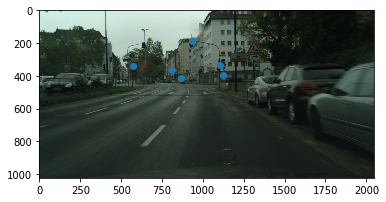

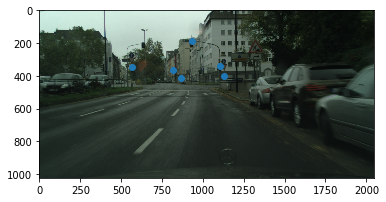

In [13]:
with open('dusseldorf_000049_000018_leftImg8bit.png', 'rb') as imgfile:
    img1 = imread(imgfile)
with open('dusseldorf_000049_000019_leftImg8bit.png', 'rb') as imgfile:
    img2 = imread(imgfile)

plt.figure('frame 18')
plt.imshow(img1)
plt.scatter(points_18[0][:, 0], points_18[0][:, 1])
plt.figure('frame 19')
plt.imshow(img2)
plt.scatter(points_19[0][:, 0], points_19[0][:, 1])
plt.show()

# find match for the first point

In [5]:
idx = 0
possible_matches = []
color = points_18[1][idx]
point = points_18[0][idx]
#creating homogonize vector and substracting the principle point to have the point in sfm coordinate system
pt1 = np.ones(3)
pt1[0] = point[0] - pp[0]
pt1[1] = point[1] - pp[1]
for jdx, point1 in enumerate(points_19[0]):
    if color == points_19[1][jdx]: # only matching if same color
        pt2 = np.ones(3)
        pt2[0] = point1[0] - pp[0]
        pt2[1] = point1[1] - pp[1]
        epipolar_distance = point_from_epipolar(pt2, pt1, foe)
        possible_matches.append((epipolar_distance, jdx))
possible_matches = sorted(possible_matches, key=lambda x: x[0])
# choosing the point with the same color and lowest epipolar distance as match
point1 = points_19[0][possible_matches[0][1]]
pt2 = np.ones(3)
pt2[0] = point1[0] - pp[0]
pt2[1] = point1[1] - pp[1]
pt2[:2] /= focal_length
pt1[:2] /= focal_length
#calculating depth from sfm
zx, zy = ZfromTracking(pt2[:, np.newaxis], pt1[:, np.newaxis], EM[:3, :3], EM[:3, 3][:, np.newaxis])
print(zx, zy)

[46.86200988] [31.61729621]


In [1]:

print(a)

TypeError: unsupported operand type(s) for -: 'list' and 'list'